In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [52]:
import os
os.getcwd()


'/Users/michaelashley/Documents/Coding-Temple/Mod-7/M7-Project-Home-Price-Predictions/code'

In [53]:
df = pd.read_csv("Original_Data/ameshousing.csv")

In [54]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# Inspection and Cleaning

In [56]:
# Lowercasing all column names
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['order', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
      

In [57]:
# Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order            2930 non-null   int64  
 1   pid              2930 non-null   int64  
 2   ms_subclass      2930 non-null   int64  
 3   ms_zoning        2930 non-null   object 
 4   lot_frontage     2440 non-null   float64
 5   lot_area         2930 non-null   int64  
 6   street           2930 non-null   object 
 7   alley            198 non-null    object 
 8   lot_shape        2930 non-null   object 
 9   land_contour     2930 non-null   object 
 10  utilities        2930 non-null   object 
 11  lot_config       2930 non-null   object 
 12  land_slope       2930 non-null   object 
 13  neighborhood     2930 non-null   object 
 14  condition_1      2930 non-null   object 
 15  condition_2      2930 non-null   object 
 16  bldg_type        2930 non-null   object 
 17  house_style   

In [58]:
# Distribution of data types
df.dtypes.value_counts()

object     43
int64      28
float64    11
Name: count, dtype: int64

In [59]:
# Inspecting Nulls
pd.set_option('display.max_rows', None)
df.isna().sum()

order                 0
pid                   0
ms_subclass           0
ms_zoning             0
lot_frontage        490
lot_area              0
street                0
alley              2732
lot_shape             0
land_contour          0
utilities             0
lot_config            0
land_slope            0
neighborhood          0
condition_1           0
condition_2           0
bldg_type             0
house_style           0
overall_qual          0
overall_cond          0
year_built            0
year_remod/add        0
roof_style            0
roof_matl             0
exterior_1st          0
exterior_2nd          0
mas_vnr_type       1775
mas_vnr_area         23
exter_qual            0
exter_cond            0
foundation            0
bsmt_qual            80
bsmt_cond            80
bsmt_exposure        83
bsmtfin_type_1       80
bsmtfin_sf_1          1
bsmtfin_type_2       81
bsmtfin_sf_2          1
bsmt_unf_sf           1
total_bsmt_sf         1
heating               0
heating_qc      

### Inspecting Lot Frontage

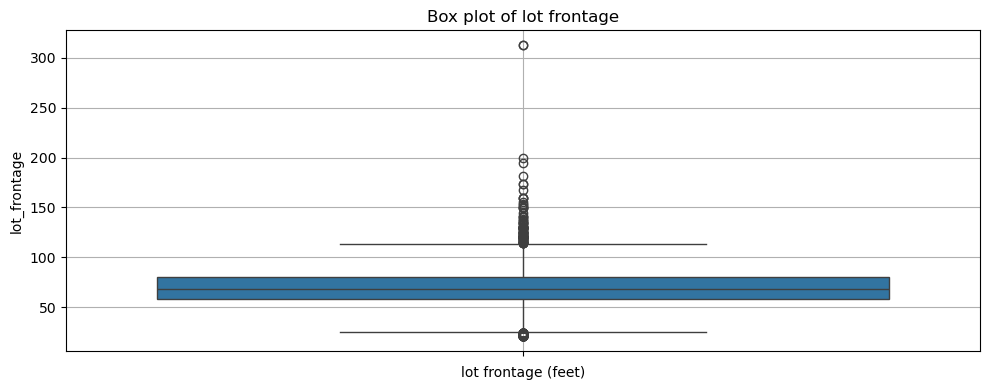

In [61]:
# Analyzing the distribution of lot frontage
plt.figure(figsize = (10,4))
sns.boxplot(data=df['lot_frontage'])
plt.title('Box plot of lot frontage')
plt.xlabel('lot frontage (feet)')
plt.grid(True)
plt.tight_layout()

In [62]:
df['neighborhood'].isna().sum()

0

In [63]:
# Imputing the median for 'lot frontage' by neighborhood
df['lot_frontage'] = df.groupby('neighborhood')['lot_frontage'].transform(
    lambda x: x.fillna(x.median())
)


In [64]:
df['lot_frontage'].isna().sum()

3

In [65]:
df['lot_frontage'] = df['lot_frontage'].fillna(df['lot_frontage'].median())

In [66]:
df['lot_frontage'].isna().sum()

0

### Inspecting Alley

In [68]:
df['alley'].value_counts(dropna=False)

alley
NaN     2732
Grvl     120
Pave      78
Name: count, dtype: int64

In [69]:
# Imputing NaN with 'No Alley'
df['alley'] = df['alley'].fillna('No Alley')
df['alley'].value_counts()

alley
No Alley    2732
Grvl         120
Pave          78
Name: count, dtype: int64

### Inspecting masonary vaneer types

In [71]:
# Looking at the distribution of masonary vaneer types
df['mas_vnr_type'].value_counts(dropna=False)

mas_vnr_type
NaN        1775
BrkFace     880
Stone       249
BrkCmn       25
CBlock        1
Name: count, dtype: int64

In [72]:
# Cross-referencing with masonary vaneer area to see if no vaneer = NaN
df[df['mas_vnr_type'].isna()]['mas_vnr_area'].value_counts()

mas_vnr_area
0.0      1745
1.0         3
344.0       1
312.0       1
285.0       1
288.0       1
Name: count, dtype: int64

In [73]:
# Filling NaN with 'None'
df['mas_vnr_type'] = df['mas_vnr_type'].fillna('None')


In [74]:
# Using OneHotEncoder to convert 'mas_vnr_type' categories into separate binary columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
mas_vnr_encoded = encoder.fit_transform(df[['mas_vnr_type']])

In [75]:
# Saving binary columns to df
mas_vnr_encoded_df = pd.DataFrame(
    mas_vnr_encoded,
    columns=encoder.get_feature_names_out(['mas_vnr_type']),
    index=df.index
)

df = pd.concat([df, mas_vnr_encoded_df], axis=1)


In [76]:
# Dropping 'mas_vnr_type'
df.drop('mas_vnr_type', axis=1, inplace=True)

In [77]:
df.to_csv('cleaned_ames.csv', index=False)

#### Replaced missing values in mas_vnr_type with "None" and one-hot encoded the categories into binary columns for modeling.
#### Since most veneer types are "None", those rows have 1 in the mas_vnr_type_None column, while all other veneer type columns are 0.

### Inspecting Masonary Vaneer area

In [80]:
# Looking at the missing values
df[df['mas_vnr_area'].isna()][[
    'mas_vnr_type_BrkFace',
    'mas_vnr_type_Stone',
    'mas_vnr_type_BrkCmn',
    'mas_vnr_type_CBlock',
    'mas_vnr_type_None'
]].sum()


mas_vnr_type_BrkFace     0.0
mas_vnr_type_Stone       0.0
mas_vnr_type_BrkCmn      0.0
mas_vnr_type_CBlock      0.0
mas_vnr_type_None       23.0
dtype: float64

In [81]:
# Filling missing values with 0.0
df['mas_vnr_area'] = df['mas_vnr_area'].fillna(0.0)

### Inspecting Basements

In [83]:
# Confirming rows with missing square footage also have missing basement types
df[df[['bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf']].isnull().any(axis=1)][[
    'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2',
    'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf'
]]


,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf
1341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
# Filling categorical columns with none
bsmt_cat_cols = ['bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2']
df[bsmt_cat_cols] = df[bsmt_cat_cols].fillna('None')

In [85]:
# Filling numerical columns with 0.0
bsmt_num_cols = ['bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0.0)

#### Most houses without basements had their basement square footage correctly recorded as 0.0.

#### Only one row (1341) is missing both categorical and numeric basement data — a data entry gap.



### Inspecting one missing value in the electrical column
### Inspecting two missing values in in the basement full and half bathroom columns

In [88]:
df['electrical'].value_counts()

electrical
SBrkr    2682
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64

In [89]:
# Imputing 1 missing value with 'SBrkr'
df['electrical'] = df['electrical'].fillna('SBrkr')

In [90]:
df['bsmt_full_bath'].value_counts()

bsmt_full_bath
0.0    1707
1.0    1181
2.0      38
3.0       2
Name: count, dtype: int64

In [91]:
# Imputing 2 missing values with 0.0
df['bsmt_full_bath'] = df['bsmt_full_bath'].fillna(0.0)

In [92]:
df['bsmt_half_bath'].value_counts()

bsmt_half_bath
0.0    2753
1.0     171
2.0       4
Name: count, dtype: int64

In [93]:
# Imputing 2 mssing values with 0.0
df['bsmt_half_bath'] = df['bsmt_half_bath'].fillna(0.0)

### Inspecting missing values wihin fireplace quality

In [95]:
# If the house has no fireplace, then there is no fireplace quality to rate 
df[df['fireplace_qu'].isna()]['fireplaces'].value_counts()

fireplaces
0    1422
Name: count, dtype: int64

In [96]:
df['fireplace_qu'] = df['fireplace_qu'].fillna('None')


### Inspecting missing values withing the garages column

In [98]:
df.isna().sum()

order                      0
pid                        0
ms_subclass                0
ms_zoning                  0
lot_frontage               0
lot_area                   0
street                     0
alley                      0
lot_shape                  0
land_contour               0
utilities                  0
lot_config                 0
land_slope                 0
neighborhood               0
condition_1                0
condition_2                0
bldg_type                  0
house_style                0
overall_qual               0
overall_cond               0
year_built                 0
year_remod/add             0
roof_style                 0
roof_matl                  0
exterior_1st               0
exterior_2nd               0
mas_vnr_area               0
exter_qual                 0
exter_cond                 0
foundation                 0
bsmt_qual                  0
bsmt_cond                  0
bsmt_exposure              0
bsmtfin_type_1             0
bsmtfin_sf_1  

In [99]:
# Seeing if all missing values relate to no garage
df[df[['garage_type', 'garage_yr_blt', 'garage_finish', 'garage_qual', 'garage_cond']].isnull().all(axis=1)][['garage_cars', 'garage_area']]

,garage_cars,garage_area
27,0.0,0.0
119,0.0,0.0
125,0.0,0.0
129,0.0,0.0
130,0.0,0.0
170,0.0,0.0
171,0.0,0.0
186,0.0,0.0
203,0.0,0.0
206,0.0,0.0


In [100]:
df[df[['garage_type', 'garage_yr_blt', 'garage_finish', 'garage_qual', 'garage_cond']].isnull().all(axis=1)][['garage_cars', 'garage_area']].shape

(157, 2)

In [101]:
# Imputing missing categorical garage column values with None
garage_cat_cols = ['garage_type', 'garage_finish', 'garage_qual', 'garage_cond']
df[garage_cat_cols] = df[garage_cat_cols].fillna('None')


In [102]:
# Imputing missing numerical garage column values with 0.0
garage_num_cols = ['garage_yr_blt', 'garage_cars', 'garage_area']
df[garage_num_cols] = df[garage_num_cols].fillna(0.0)

In [103]:
# Encoding categorical garage column values with numerical values
garage_encoded = pd.get_dummies(df[garage_cat_cols], prefix = garage_cat_cols, dtype = int)
df = pd.concat([df.drop(garage_cat_cols, axis=1), garage_encoded], axis = 1)

### Inspecting missing pool quality values

In [105]:
df[df['pool_qc'].isna()]['pool_area'].value_counts()

pool_area
0    2917
Name: count, dtype: int64

In [106]:
# Imputing missing pool quality values with None
df['pool_qc'] = df['pool_qc'].fillna('None')

### Imputing missing values in the fence column with None

In [108]:
df['fence'] = df['fence'].fillna('None')

### Imputing missing values in the misc_feature column with None

In [110]:
df['misc_feature'] = df['misc_feature'].fillna('None')


In [111]:
df.isna().sum()

order                   0
pid                     0
ms_subclass             0
ms_zoning               0
lot_frontage            0
lot_area                0
street                  0
alley                   0
lot_shape               0
land_contour            0
utilities               0
lot_config              0
land_slope              0
neighborhood            0
condition_1             0
condition_2             0
bldg_type               0
house_style             0
overall_qual            0
overall_cond            0
year_built              0
year_remod/add          0
roof_style              0
roof_matl               0
exterior_1st            0
exterior_2nd            0
mas_vnr_area            0
exter_qual              0
exter_cond              0
foundation              0
bsmt_qual               0
bsmt_cond               0
bsmt_exposure           0
bsmtfin_type_1          0
bsmtfin_sf_1            0
bsmtfin_type_2          0
bsmtfin_sf_2            0
bsmt_unf_sf             0
total_bsmt_s

In [112]:
df.to_csv('cleaned_ames.csv', index=False)

In [113]:
df.select_dtypes(include=['object']).columns.tolist()

['ms_zoning',
 'street',
 'alley',
 'lot_shape',
 'land_contour',
 'utilities',
 'lot_config',
 'land_slope',
 'neighborhood',
 'condition_1',
 'condition_2',
 'bldg_type',
 'house_style',
 'roof_style',
 'roof_matl',
 'exterior_1st',
 'exterior_2nd',
 'exter_qual',
 'exter_cond',
 'foundation',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_type_2',
 'heating',
 'heating_qc',
 'central_air',
 'electrical',
 'kitchen_qual',
 'functional',
 'fireplace_qu',
 'paved_drive',
 'pool_qc',
 'fence',
 'misc_feature',
 'sale_type',
 'sale_condition']

In [114]:
# One-hot encoding all remaining categorical columns 
# to prepare a fully numeric dataset for regression modeling.

cat_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=cat_cols, dtype=int)
df.to_csv('model_ready_ames.csv', index=False)

# EDA

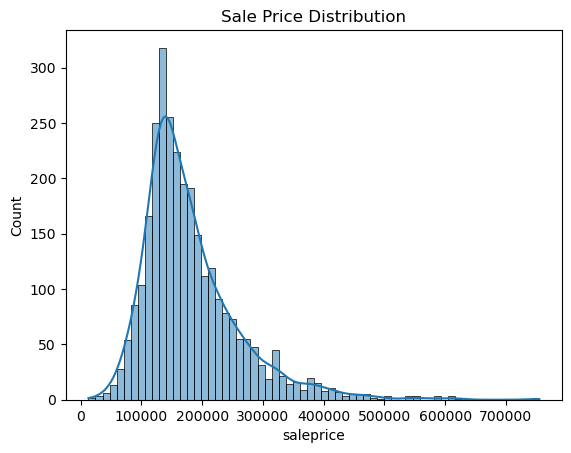

In [116]:
# Sale price distribution
sns.histplot(df['saleprice'], kde = True)
plt.title('Sale Price Distribution');

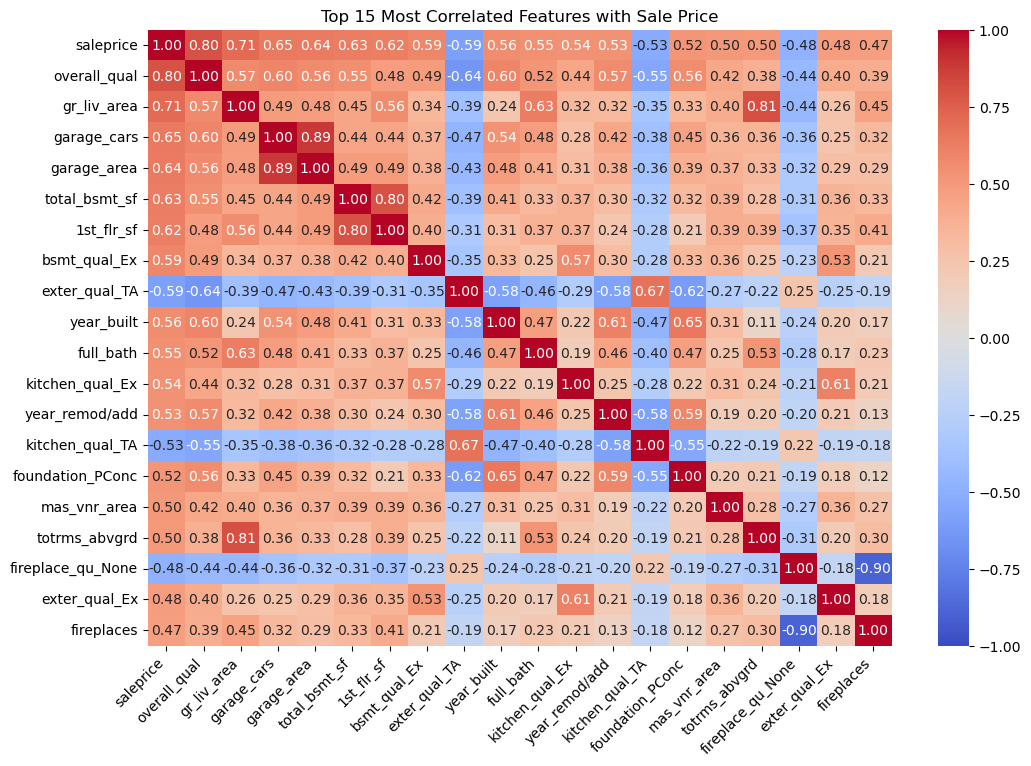

In [117]:

# Calculate correlation matrix for numeric columns
corr = df.corr(numeric_only=True)

# Get top 15 features most correlated with saleprice
top_corr = corr['saleprice'].abs().sort_values(ascending=False).head(20).index

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[top_corr].corr(), annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Top 15 Most Correlated Features with Sale Price")
plt.xticks(rotation=45, ha='right')
plt.show()


In [118]:
df = pd.read_csv('cleaned_ames.csv')

# Calculating top_corr
corr = df.corr(numeric_only=True)
top_corr = corr['saleprice'].abs().sort_values(ascending=False).head(15)


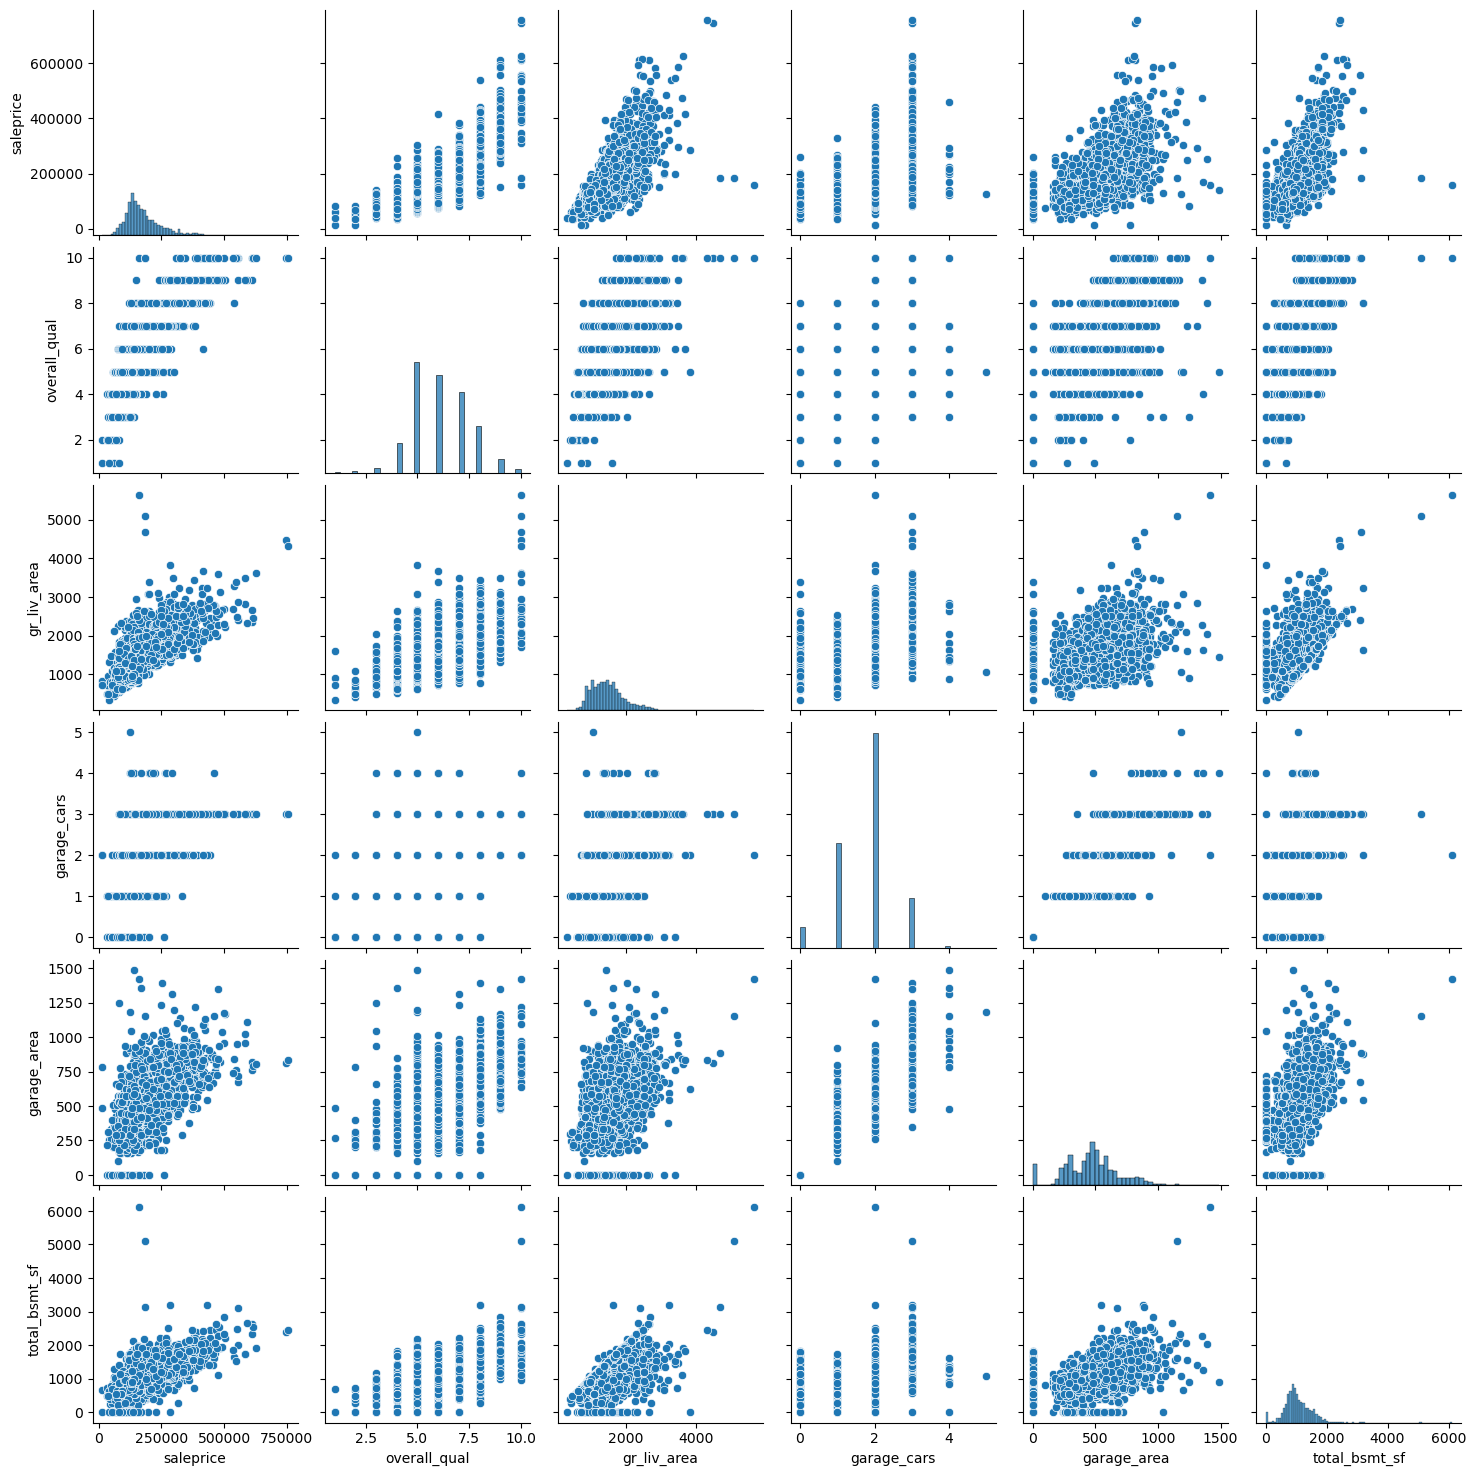

In [119]:
# Looking at the top 6 correlated variabled on a pair plot to avoid overload
top_features = top_corr.index[:6]
sns.pairplot(df[top_features]);

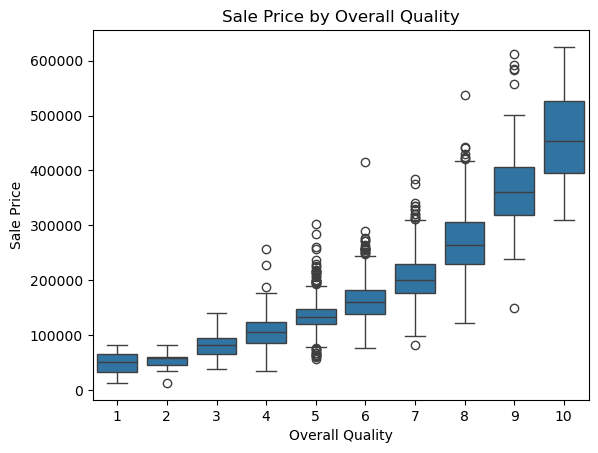

In [209]:
# Visualizing categorical features with sale price
sns.boxplot(data = df,
            x = 'overall_qual',
            y = 'saleprice')
plt.title('Sale Price by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.savefig("my_plot.png");
plt.show()

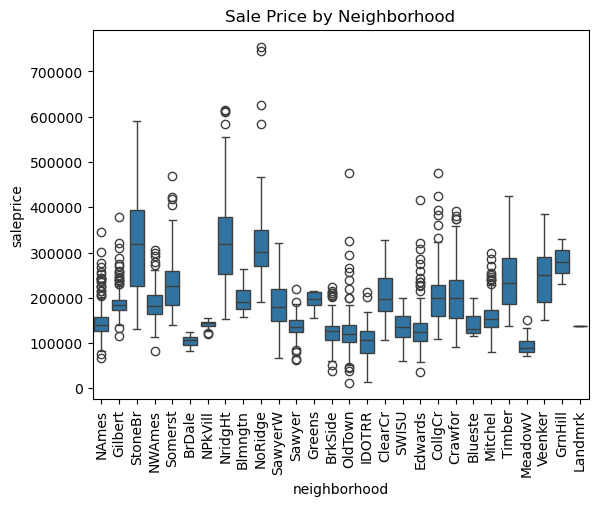

In [121]:
sns.boxplot(x='neighborhood', y='saleprice', data=df)
plt.xticks(rotation=90)
plt.title('Sale Price by Neighborhood')
plt.show()

### Inspecting for multicollinearity

In [123]:
# Filter numeric features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Correlation matrix
corr_matrix = df[num_cols].corr().abs()

# Find pairs with high correlation (excluding self-correlation)
high_corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

# Show pairs with correlation > 0.75
high_corr_pairs[high_corr_pairs > 0.75]


garage_finish_None    garage_qual_None      1.000000
                      garage_cond_None      1.000000
garage_qual_None      garage_cond_None      1.000000
garage_yr_blt         garage_cond_None      0.998470
                      garage_qual_None      0.998470
                      garage_finish_None    0.998470
garage_type_None      garage_finish_None    0.993332
                      garage_qual_None      0.993332
                      garage_cond_None      0.993332
garage_yr_blt         garage_type_None      0.991812
order                 yr_sold               0.975993
garage_cars           garage_area           0.889866
mas_vnr_type_BrkFace  mas_vnr_type_None     0.812218
gr_liv_area           totrms_abvgrd         0.807772
total_bsmt_sf         1st_flr_sf            0.800429
overall_qual          saleprice             0.799262
garage_yr_blt         garage_cond_TA        0.768483
garage_cond_None      garage_cond_TA        0.759637
garage_finish_None    garage_cond_TA        0.

In [124]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

### Identifying variance inflation factor. VIF measures how much the variance of a regression coefficient is inflated due to multicollinearity among the predictors.

In [126]:
X = df.drop(columns='saleprice').select_dtypes(include=['int64', 'float64'])


X_const = add_constant(X)

vif = pd.DataFrame()
vif['feature'] = X_const.columns
vif['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
vif.sort_values(by='VIF', ascending=False)


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
64,garage_cond_None,inf
65,garage_cond_Po,inf
45,garage_type_Attchd,inf
18,gr_liv_area,inf
17,low_qual_fin_sf,inf
16,2nd_flr_sf,inf
15,1st_flr_sf,inf
14,total_bsmt_sf,inf
13,bsmt_unf_sf,inf
12,bsmtfin_sf_2,inf


In [127]:
columns_to_drop = [
    'garage_cond_None', 'garage_qual_None', 'garage_finish_None', 'garage_type_None',
    'garage_cond_Po', 'garage_cond_TA', 'garage_cond_Gd', 'garage_cond_Ex', 'garage_cond_Fa',
    'garage_qual_Po', 'garage_qual_TA', 'garage_qual_Gd', 'garage_qual_Ex', 'garage_qual_Fa',
    'garage_finish_Unf', 'garage_finish_RFn', 'garage_finish_Fin',
    'garage_type_BuiltIn', 'garage_type_CarPort', 'garage_type_Detchd', 'garage_type_Attchd',
    'garage_type_Basment', 'garage_type_2Types',
    'mas_vnr_type_None', 'mas_vnr_type_BrkFace', 'mas_vnr_type_BrkCmn', 'mas_vnr_type_CBlock', 'mas_vnr_type_Stone'
]
df = df.drop(columns=columns_to_drop, errors='ignore')


In [128]:
X = df.drop(columns='saleprice').select_dtypes(include=['int64', 'float64'])
X_const = add_constant(X)

vif = pd.DataFrame()
vif['feature'] = X_const.columns
vif['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
vif.sort_values(by='VIF', ascending=False)


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
11,bsmtfin_sf_1,inf
18,gr_liv_area,inf
17,low_qual_fin_sf,inf
16,2nd_flr_sf,inf
15,1st_flr_sf,inf
14,total_bsmt_sf,inf
13,bsmt_unf_sf,inf
12,bsmtfin_sf_2,inf
1,order,79.221304
38,yr_sold,77.130877


In [129]:
# Final drop block to clean up redundant or non-predictive features
cols_to_drop = [
    'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf',
    '2nd_flr_sf', 'low_qual_fin_sf',  # '1st_flr_sf' already dropped
    'garage_area', 'order', 'pid'
]

df = df.drop(columns=cols_to_drop, errors='ignore')




### Identifying outliers

Text(0.5, 1.0, 'Boxplot of Sale Price')

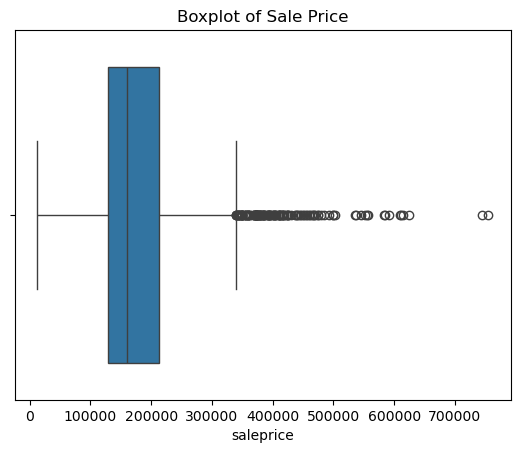

In [131]:
# Sale Price box plot
sns.boxplot(x=df['saleprice'])
plt.title("Boxplot of Sale Price")

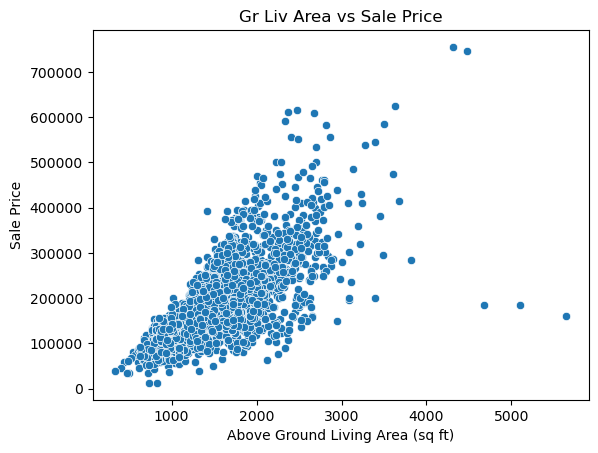

In [132]:
sns.scatterplot(x=df['gr_liv_area'], y=df['saleprice'])
plt.title("Gr Liv Area vs Sale Price")
plt.xlabel("Above Ground Living Area (sq ft)")
plt.ylabel("Sale Price");


In [133]:
# Drop outliers based on gr_liv_area and saleprice
df = df[(df['gr_liv_area'] < 4000) & (df['saleprice'] < 700000)]


In [134]:
df.to_csv('model_input.csv', index=False)

In [135]:
import os

# Delete the old, outdated file
os.remove('model_ready_ames.csv')


### Encoding remaining categorical columns to numerical columns

In [137]:
# Identify all non numerical columns
cat_cols = df.select_dtypes(include='object').columns

# One-hot encode them
df = pd.get_dummies(df, columns=cat_cols, dtype=int)

df.select_dtypes(include='object').columns



Index([], dtype='object')

In [138]:
# Updating csv
df.to_csv('model_input.csv', index=False)
